### Handle Variable Discretisation using Equal Frequency discretiser, Equal Width discretiser or Arbitrary discretiser

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
from feature_engine.imputation import DropMissingData

## Handle Variable Discretization

This technique consists of `transforming continuous numerical variables into discrete variables`. The discrete variables will contain intervals related to the numerical distribution. The interval will be decided based on the frequency or width. We will study:
* EqualFrequencyDiscretiser
* EqualWidthDiscretiser
* ArbitraryDiscretiser

When should I consider using them? We can consider these use cases:
* When your feature has an abnormal or weird numerical distribution, and by discretizing this variable, the categorical distribution is better understood by the model
* You have a continuous target variable, and you are not successful in fitting a model to the dataset. Then, you can discretize the target variable and convert the ML task to classification since your target variable is now categorical. The expectation is that we will create more conditions to find a model that fits the data.


### Equal Frequency

**Also known as: Quantile Binning**

**What it does:**
* Divides the data into bins such that each bin has (approximately) the same number of data points.

**How it works:**
* Sort the data.
* Divide it into n bins where each bin contains the same number of records.
* Bin boundaries are based on quantiles (e.g., quartiles, deciles).
**Example:** If you have 1000 data points and want 4 bins:
- Each bin will contain ~250 data points.

**Pros:**
Balances bin sizes (useful for models sensitive to distribution).
Good when data is skewed.

**Cons:**
Bin widths can vary a lot.
Outliers might distort bins.


It divides continuous numerical variables into contiguous equal frequency intervals, intervals containing approximately the same proportion of observations. The function documentation is found [here](https://feature-engine.trainindata.com/en/latest/user_guide/discretisation/EqualFrequencyDiscretiser.html)
* The arguments are `variables` to apply the method; if you don't specify a variable, it will select all numerical variables. And `q` (for quantiles), which is the desired number of equal frequency intervals (or quantiles).


In [6]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [7]:
boston_data = pd.read_csv('housing.csv')
df = pd.DataFrame(data=boston_data)
df = pd.DataFrame(boston_data.target)

df.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


We assess the distribution with `sns.histplot()`

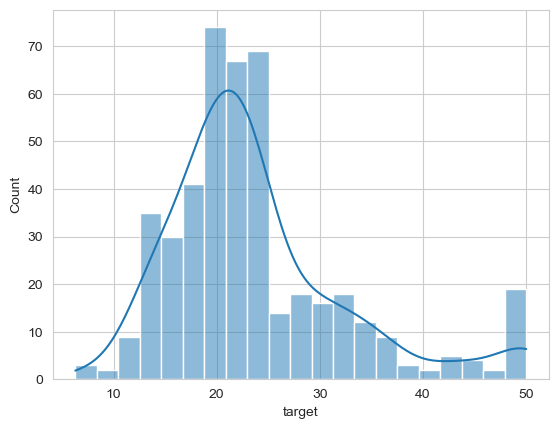

In [10]:
sns.histplot(data=df, x='target', kde=True)
plt.show()

We create a pipeline with `EqualFrequencyDiscretiser()` on the target variable and look for five bins. We then `.fit_transform()` the data
* In the workplace, you will consider criteria to select a number for ``q``. Typically, it will make sense to have 3 or 6. At the same time, you can run multiple simulations and assess the results for numerous ``q``


In [14]:
pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('efd', EqualFrequencyDiscretiser(q=5, variables='target')) # q is like a bin, which gives number of ranges we want.
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,target
0,3
1,2
2,4
3,4
4,4


We assess the efd step and check what were the bins the transformer calculated with `.binner_dict_`

In [18]:
pipeline['efd'].binner_dict_

{'target': [-inf, 17.419999999999998, 20.44, 23.160000000000004, 29.1, inf]}

Finally, we plot the new target distribution. As we may expect, all intervals have the same frequency
* Note in the plot the bar where the target is zero; it corresponds to the numerical interval of -inf to 15.3. You can extend this for the remaining bars

The upside of using this technique, considering you are using the target variable, is that your target variable for the classification task will be already balanced, which means the labels have similar frequencies.

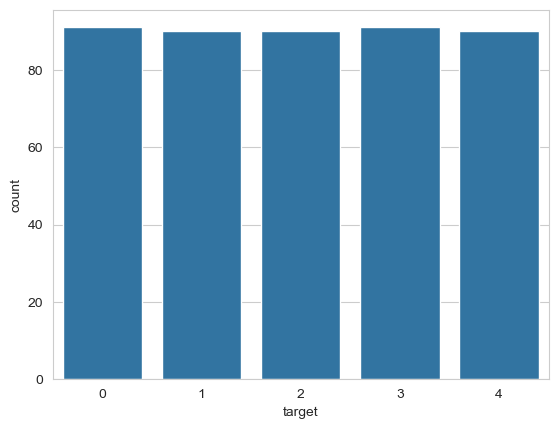

In [21]:
sns.countplot(data=df_transformed, x='target')
plt.show()

### Equal Width

**Also known as: Uniform Binning**

**What it does:**
* Divides the range of the variable into equal-width intervals, regardless of how many data points fall in each bin.

**How it works:**
* Calculate the min and max of the feature.
* Divide the range into n intervals of equal size.
**Example:** If the data ranges from 0 to 100 and you want 5 bins:
Bins would be: [0–20), [20–40), [40–60), [60–80), [80–100]

**Pros:**
* Simple and easy to interpret.
* Bin ranges are consistent.

**Cons:**
* Can result in unbalanced bins (some may be empty or sparse).
* Not ideal for skewed data.

This technique divides continuous numerical variables into intervals of the same width. Note that the count of observations per interval may vary. The function documentation is found [here](https://feature-engine.trainindata.com/en/latest/user_guide/discretisation/EqualWidthDiscretiser.html).
* The arguments are `variables` to apply the method to; if you don't parse anything, it will select all numerical variables. And `bins`, which is the number of equal-width intervals/bins you want.

In [24]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [26]:
boston_data = pd.read_csv('housing.csv')
df = pd.DataFrame(data=boston_data)
df = pd.DataFrame(boston_data.target)

df.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


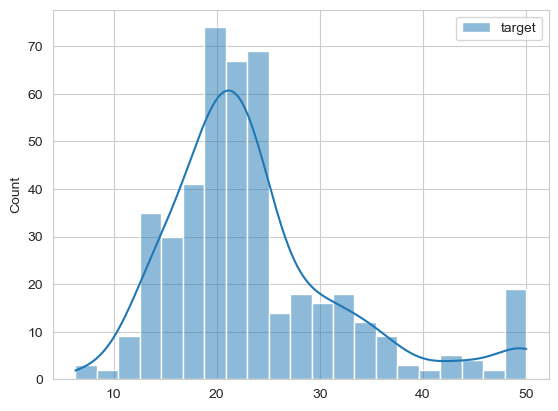

In [28]:
sns.histplot(data=df, kde=True)
plt.show()

We create a pipeline with `EqualWidthDiscretiser()` on the target variable and look for six bins. We then `.fit_transform()` the data
* In the workplace, you will consider criteria to select a number of `bins`. Typically, it will make sense to have 3 or 6. But, you can run multiple simulations and assess the results for numerous `bins`

In [55]:
pipeline = Pipeline([
    ('drop_na', DropMissingData()),
      ('ewd', EqualWidthDiscretiser(bins=6, variables=['target']) ) # q is like a bin, which gives number of ranges we want.
])

df_transformed = pipeline.fit_transform(df)
df_transformed.head()

,target
0,2
1,2
2,3
3,3
4,4


We assess the ewd step and check the bins we created with `.binner_dict_`

In [58]:
pipeline['ewd'].binner_dict_

{'target': [-inf,
  13.583333333333334,
  20.866666666666667,
  28.150000000000002,
  35.43333333333334,
  42.71666666666667,
  inf]}

Finally, we plot the new target distribution. As expected, all intervals have the same width (7.5)
* Note in the plot, the bar where the target is zero corresponds to the numerical interval of -inf to 12.5.  You can extend this for the remaining bars

The downside of using this technique, considering you are using the target variable, is that your target variable for the classification task will likely not be balanced.

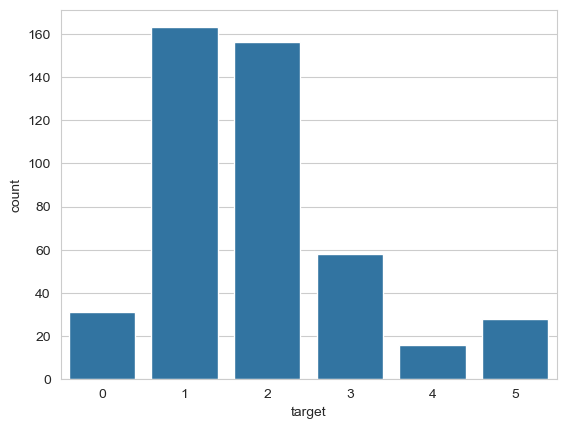

In [36]:
sns.countplot(data=df_transformed, x='target')
plt.show()

### Arbitrary Discretiser

**Also known as: Manual Binning or Custom Binning**

**What it does:**
* Allows you to define custom bin edges based on domain knowledge or specific criteria.

**How it works:**
* You provide the bin boundaries (e.g., age: [0, 18, 30, 60, 100]).
* Data points are binned based on these custom intervals.
**Example:**
* For age: Bins: 0–17 (Teen), 18–29 (Young Adult), 30–59 (Adult), 60+ (Senior)

**Pros:**
* High control over the bins.
* Can incorporate domain knowledge.

**Cons:**
* Requires manual input and expertise.
* Not data-driven (unless boundaries are chosen using some heuristic).


It divides continuous range intervals, which limits are determined by the user. The documentation is found [here](https://feature-engine.trainindata.com/en/latest/user_guide/discretisation/ArbitraryDiscretiser.html). The used argument is:
* ``binning_dict`` is a dictionary that tells which variable you want to apply the method and the intervals.

* You may use this technique when the company is comfortable with how to map the numerical values to ranges. For example, imagine if the variable is Revenue from a given purchase. The business is comfortable assuming that Revenue smaller than 100 is small, between 100 and 1000 is medium and greater than 1000 is big. You can also conduct separate analyses with other custom ranges to question current assumptions and/or look for other criteria to discretise the data.

In [63]:
from feature_engine.discretisation import ArbitraryDiscretiser

In [65]:
boston_data = pd.read_csv('housing.csv')
df = pd.DataFrame(data=boston_data)
df = pd.DataFrame(boston_data.target)

df.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


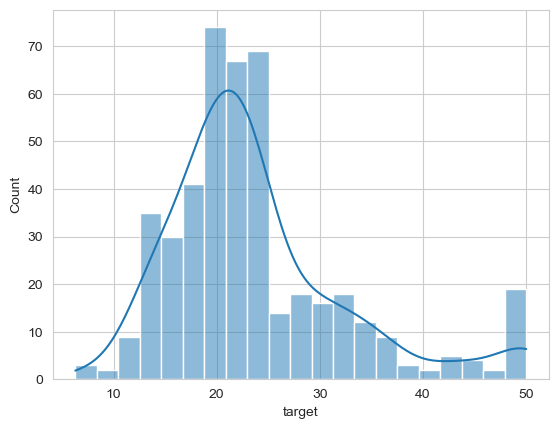

In [67]:
sns.histplot(data=df, x='target', kde=True)
plt.show()

We create a pipeline with `ArbitraryDiscretiser()` on the target variable and look for four custom bins. We then `.fit_transform()` the data
* In the workplace, you will consider criteria to select a number of `bins`. Typically, it will make sense to have 3 or 6. But, you can run multiple simulations and assess the results for numerous `bins`


In [70]:
import numpy as np # we import NumPy to set -inf and +inf

pipeline = Pipeline([
    ('drop_na', DropMissingData()),
    ('arbd', ArbitraryDiscretiser(binning_dict={'target':[-np.inf,10,20,40,np.inf]}) )
])

df_transformed = pipeline.fit_transform(df)
df_transformed

,target
0,2
1,2
2,2
3,2
4,2
...,...
501,2
502,2
503,2
504,2


We assess the arbd step and check the bins we created with `.binner_dict_`

In [73]:
pipeline['arbd'].binner_dict_

{'target': [-inf, 10, 20, 40, inf]}

Finally, we plot the new target distribution.
* Note in the plot the bar where the target is zero corresponds to the numerical interval of -inf to 10.  You can extend this for the remaining bars

The upside of this technique is that we set the intervals we are comfortable with. The downside is that the categorical distribution may be imbalanced.

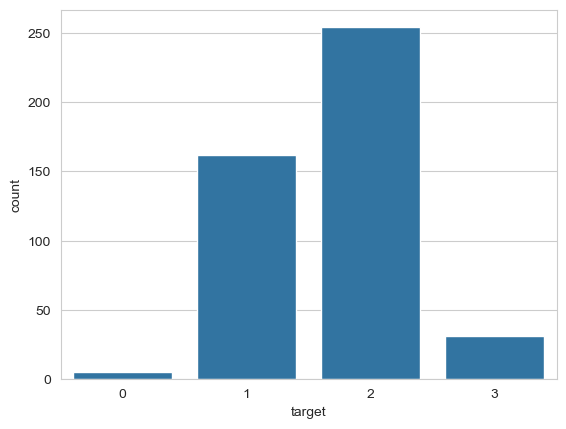

In [76]:
sns.countplot(data=df_transformed, x='target')
plt.show()